In [1]:
import csv
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [2]:
# Define the folder_path
# The folder includes all related files
folder_path = 'Witches-main/ArcGIS Online Files'

# Get the paths of all CSV files
csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create an empty DataFrame to store the 'Name' column from all files
df_name = pd.DataFrame()
dataframes = []

# Read each CSV file and add the 'Name' column to df_name
for i, csv_file in enumerate(csv_files):
    # Dynamically create variable names such as df1, df2, ..., dfn
    try:      
        df = pd.read_csv(csv_file)
        dataframes.append(df)
    except:
        continue

# Combine all DataFrames into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Remove duplicates based on the 'Name' column
clean_df = combined_df.groupby("Name", as_index=False).agg(lambda x: x.iloc[0] if x.notna().any() else None)
# clean_df.to_csv('merge.csv', index=False)

# Print information about the DataFrame
print(clean_df.info())
print(clean_df.head())

# Summary statistics for numerical fields
numerical_summary = clean_df.describe()

# Summary for non-numerical fields
categorical_summary = clean_df.describe(include=[object])

print(numerical_summary)
print(categorical_summary)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3979 entries, 0 to 3978
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   3979 non-null   object 
 1   Wikidata Page          3979 non-null   object 
 2   Residence              3979 non-null   object 
 3   Longitude              2932 non-null   float64
 4   Latitude               2932 non-null   float64
 5   Gender                 3963 non-null   object 
 6   Ethnicity              11 non-null     object 
 7   Manner of Death        205 non-null    object 
 8   Occupation             716 non-null    object 
 9   Place of Detainment    452 non-null    object 
 10  Social Classification  315 non-null    object 
 11  Wikipedia Page         22 non-null     object 
 12  Place of Death         94 non-null     object 
 13  CivilParish1930Code    0 non-null      object 
 14  CivilParish1930Name    0 non-null      object 
 15  Numb

## **PART 1: Describe**
**--The code is as shown above--**  
We utilized 26 CSV files in our dataset, which are ArcGIS geospatial files storing various information about different witches. To obtain more concise data, we first merged these 27 datasets and consolidated and removed duplicate entries with the same names using the above code. As a result, we obtained a merged file containing the following fields (types).

-Name: Object (string), a categorical field with names of individuals.  
-Wikidata Page: Object (string), URLs to Wikidata pages, categorical.  
-Residence: Object (string), categorical field with the residence locations.    
-Longitude and Latitude: (Float64), numerical fields indicating geographical coordinates.  
-Gender: Object (string), categorical field with gender descriptions.  
-Ethnicity: Object (string),  categorical field with ethnicity descriptions.  
-Manner of Death: Object (string), record about he death manner
-Occupation: Object (string), categorical field with occupation descriptions.  
-Place of Detainment: Object (string), Detainment place.
-Social Classification: Object (string), the social classification of the witch.
-Wikipedia Page: Object (string), URLs to Wikipedia pages, categorical.  
-Place of Death: Object (string), Death place of the witch.
-CivilParish1930Code and CivilParish1930Name: （Float64）
-Number: (Float64)  
-Long and Lat: (Float64), numerical fields for geographical coordinates.  


### Numerical Fields:

-Longitude: Mean of approximately -3.32, with values ranging from -6.82 to -0.87.  
-Latitude: Mean of approximately 56.27, with values ranging from 54.81 to 60.80.  
-Long: Similar to Longitude, mean of -3.32, with a similar range.  
-Lat: Similar to Latitude, mean of 56.16, with a similar range.  
-The CivilParish1930Code, CivilParish1930Name, and Number fields have no non-null values.  

### Categorical Fields:

-Name: 3979 unique entries, indicating differen people.  
-Wikidata Page: 3979 unique URLs, each corresponding to a different wikidata entry.  
-Residence: 891 unique locations listed.  
-Gender: Two genders are listed, with 'Female' being the most common.  
-Ethnicity: Only 11 non-null entries with 4 unique values, 'Gaels' being the most common.  
-Manner of Death: Only two categories are present, with 'Capital Punishment' being the more common.  
-Occupation: 71 unique occupations listed, 'Minister' being the most common among 716 entries.  
-Place of Detainment: 88 unique places, with 'Edinburgh' being the top location.  
-Social Classification: Seven levels listed, 'Middling' being the most frequent among 315 entries.  
-Wikipedia Page: 22 non-null entries with 18 unique URLs, the content are same as the Wikidata Page.
-Place of Death: 94 entries with 25 unique places, 'Castle Hill' being the most frequent.  

The fields with geographical coordinates (Longitude, Latitude, Long, Lat) suggest a spatial component to the data, potentially useful for mapping or spatial analysis. The presence of fields like Occupation, Place of Detainment, and Social Classification suggests the data might be historical or sociological, possibly related to demographic studies, historical research, or genealogical studies, which offer us more information to analysis the different aspect of data. If we would like learn about some witches, Wikidata Page offer us to learn more about the background of witches.

## **PART 2：Explore**
**Exploration 1：Gender Distribution of the witches by Longitude and Latitude**

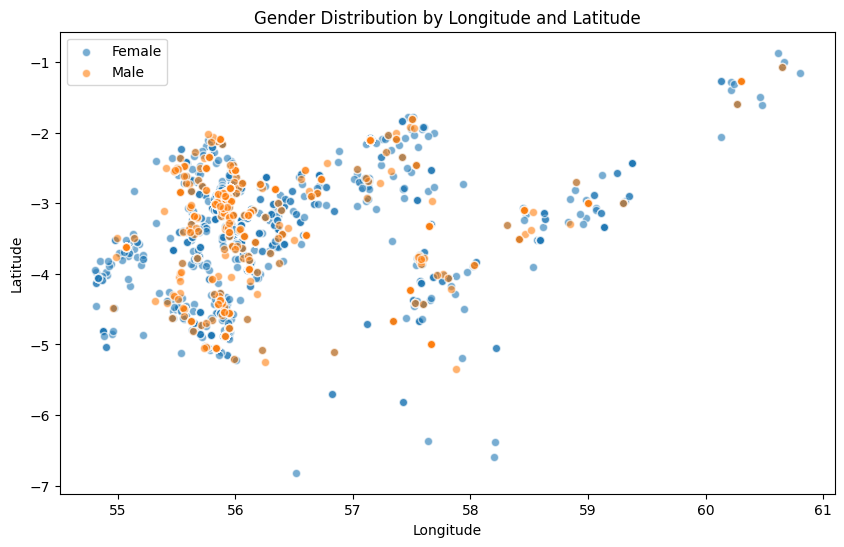

In [3]:
# Create a scatter plot of latitude and longitude using matplotlib, and categorize by gender

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the distribution diagram by gender
for gender, group_data in clean_df.groupby('Gender'):
    plt.scatter(group_data['Latitude'], group_data['Longitude'], label=gender, alpha=0.6, edgecolors='w')

# Legend
plt.legend()

# Title and labels
plt.title('Gender Distribution by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

**Description and interpretation**  

The Gender distribution of witches is relatively uniform, but the overall density is denser in the west than in the east. At the same time, I noticed a gap in the center of the map, and I suspected that it was due to missing data. Finally, after comparing it with a real-world map, I found that the empty area corresponded to a mountainous region. Therefore, the lack of data in this area is reasonable.

**Exploration 2：The Percentage of Witches in Different Gender Categories Based on Social Class**

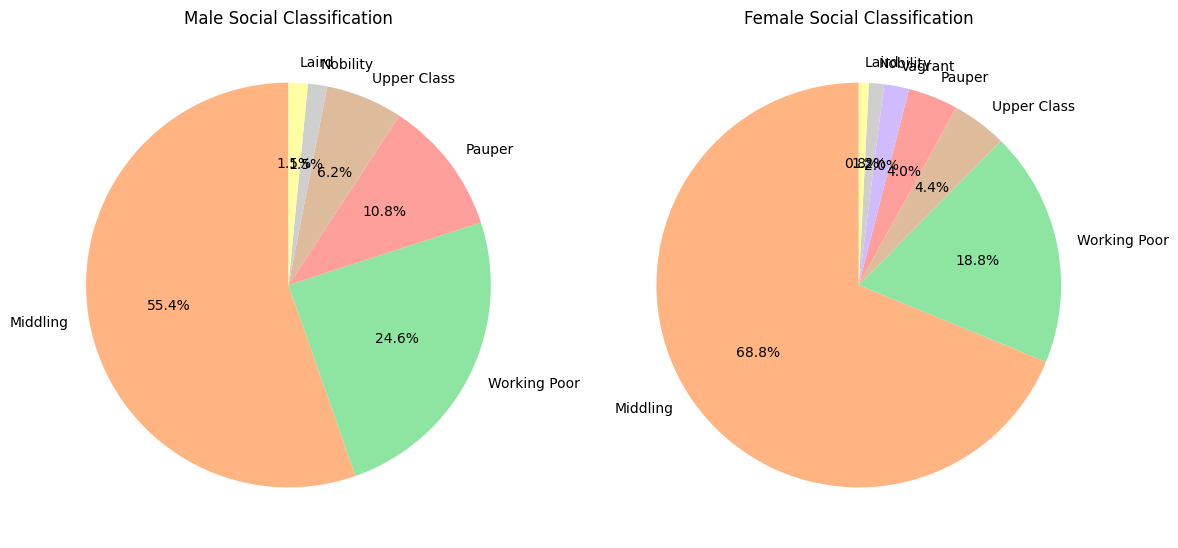

In [4]:
df = clean_df

# Create a color palette to ensure consistent colors for the same social classification across different pie charts
color_palette = sns.color_palette("pastel", len(df["Social Classification"].unique()))
classification_colors = dict(zip(df["Social Classification"].unique(), color_palette))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Draw the first pie chart: Distribution of males in social classification
male_data = df[df["Gender"] == "Male"]["Social Classification"].value_counts()
male_colors = [classification_colors.get(classification, "gray") for classification in male_data.index]
axes[0].pie(male_data, labels=male_data.index, autopct='%1.1f%%', startangle=90, colors=male_colors)
axes[0].set_title("Male Social Classification")

# Draw the second pie chart: Distribution of females in social classification
female_data = df[df["Gender"] == "Female"]["Social Classification"].value_counts()
female_colors = [classification_colors.get(classification, "gray") for classification in female_data.index]
axes[1].pie(female_data, labels=female_data.index, autopct='%1.1f%%', startangle=90, colors=female_colors)
axes[1].set_title("Female Social Classification")

# Display the pie charts
plt.tight_layout()
plt.show()

**Description and interpretation**  

Comparing the two pie charts reveals a similarity in the distribution of male and female witches across social classifications. In both genders, the most prominent social class among witches is "Middling," followed by "Working Poor." However, there is a notable difference in the proportion of male "Paupers" engaged in witchcraft, which stands at 10.8%, significantly higher than the 4% of female "Paupers" involved in witchcraft.

**Exploration 3：Social Classification in different Residences (the 4 most popular residences)**

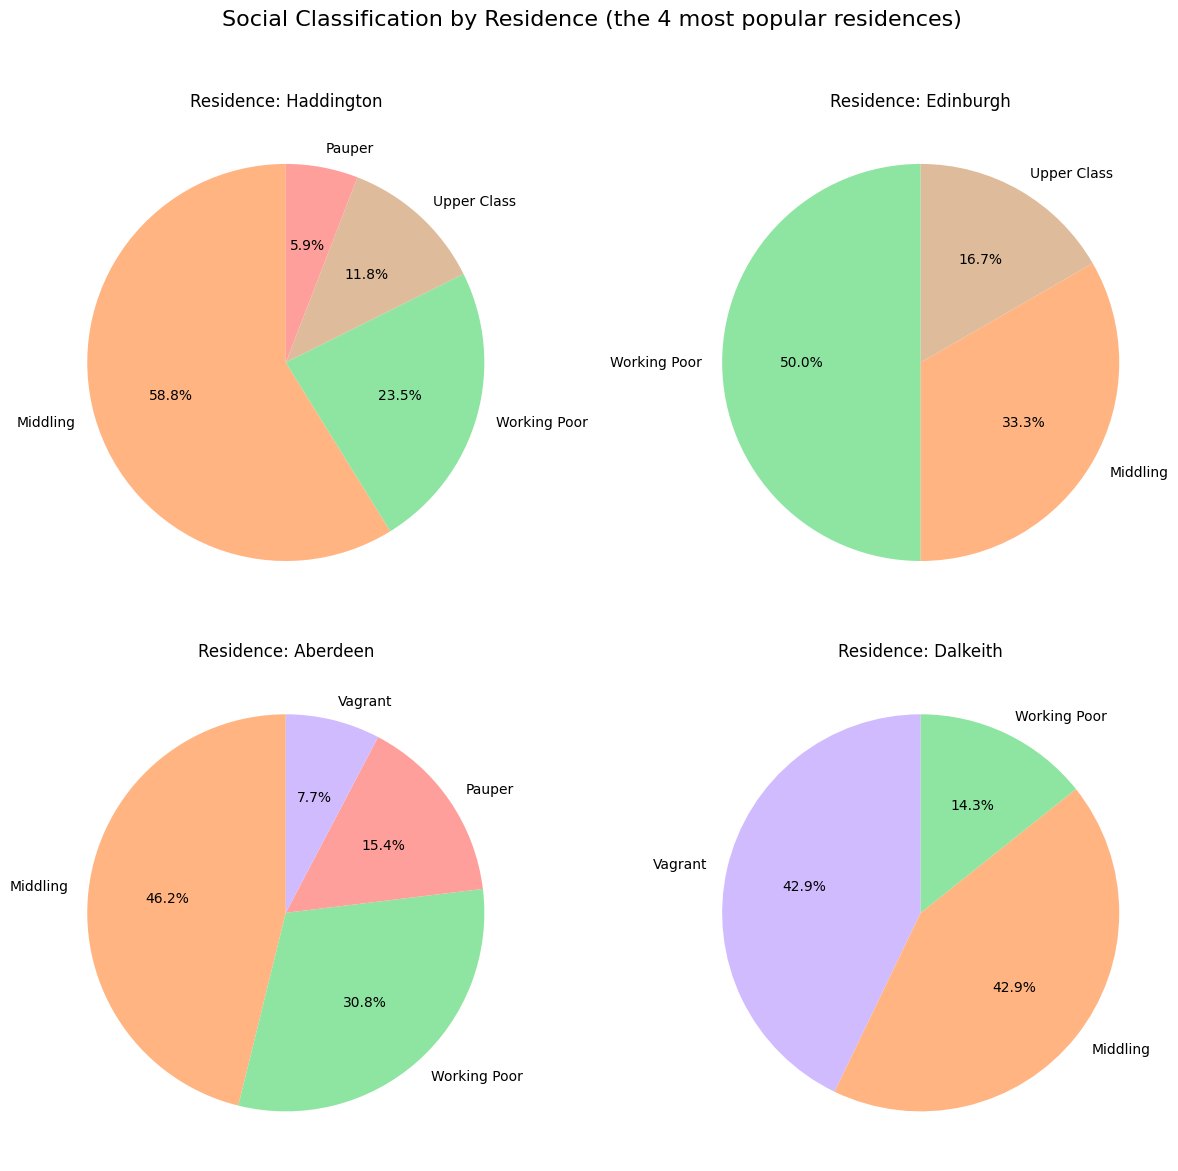

In [5]:
top_residences = df["Residence"].value_counts().head(4).index

# Create a figure containing four subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Social Classification by Residence (4 the most popular residences)", fontsize=16)

# Create a color mapping to ensure that the same social classification has the same color in different pie charts
color_palette = sns.color_palette("pastel", len(df["Social Classification"].unique()))
classification_colors = dict(zip(df["Social Classification"].unique(), color_palette))

# Plot a pie chart for each Residence
for i, residence in enumerate(top_residences):
    row = i // 2
    col = i % 2
    residence_df = df[df["Residence"] == residence]
    social_classification_counts = residence_df["Social Classification"].value_counts()
    
    # Get colors for the same social classification
    colors = [classification_colors.get(classification, "gray") for classification in social_classification_counts.index]
    
    # Draw the pie chart and use the same colors
    axes[row, col].pie(social_classification_counts, labels=social_classification_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[row, col].set_title(f"Residence: {residence}")

# Adjust the layout of subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Display the figure
plt.show()


**Description and interpretation** 

These four charts depict the top four regions with the highest number of individuals engaged in witchcraft: Haddington, Edinburgh, Aberdeen, and Dalkeith. While each region has a significant presence of both "Middling" and "Working Poor" classifications, the distribution varies across these four areas. For instance, in Haddington, the predominant category is "Middling" at 58.8%, whereas in Edinburgh, "Working Poor" takes the lead. In Aberdeen, the "Pauper Witch" category reaches a notable 15.4%. Surprisingly, in Dalkeith, both "Vagrant" and "Middling" have an equal share of the distribution (42.9%).


## **PART 3：Reflect and Hypotheses**

**Hypothesis 1**  
Witchcraft culture appears to be more prevalent in the western part of Edinburgh.

Reasoning: As shown in Figure 1, there is a higher concentration of witch addresses in the western part of Edinburgh, gradually decreasing from west to east.

Validation Method: To validate this hypothesis, I will initially calculate the witch density difference between the east and west regions. Subsequently, I will engage in discussions with the data provider to gain insights into the origins and spread of witchcraft culture at that time, thereby determining any disparities in witchcraft culture between the eastern and western parts of Edinburgh.

  
**Hypothesis 2**  
Male individuals with a "Pauper" social classification are more likely to be associated with the witchcraft profession compared to females.

Reasoning: Figure 2 illustrates the distribution of social classifications among male and female witches. While "Middling" is the predominant classification for both genders, the percentage of "Pauper" classification among males is notably higher at 10.8%, in contrast to only 4% among females.

Validation Method: While Figure 2 provides partial support for this hypothesis, further analysis can be conducted through literature research on the socio-economic context of that period to delve deeper into the hypothesis.


**Hypothesis 3**  
The distribution of social classifications among witches may reflect the economic structure of the region during that time.

Reasoning: Figure 3 displays the social classifications of witches in the four most prominent areas associated with witchcraft culture. Notably, there are significant variations in the proportions of each social classification in these regions, suggesting potential links to variations in economic development across regions.

Validation Method: Initially, regions with similar classification structures will be grouped. Subsequently, historical GDP (Gross Domestic Product) data of these regions or areas from that time will be examined. This analysis aims to determine whether differences in GDP correspond to variations in the proportions of social classifications among witches in those areas. For instance, a region with a predominant "Vagrant" social classification among witches may indicate a less developed economic situation in that area.